# Project1: Scraping a table

In [2]:
import requests
from bs4 import BeautifulSoup


#Imports the HTML into python
url = 'https://www.worldometers.info/world-population/'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml') # lxml vs html.parser : lxml in faster but has c dependencies


In [3]:
#Subsets the HTML to only get the HTML of our table needed
table = soup.find('table', class_ = 'table table-striped table-bordered table-hover table-condensed table-list')


In [ ]:
#Subsets the HTML to only get the HTML of our table needed
table = soup.find('table', 
                  attr = {'class' : 'table table-striped table-bordered table-hover table-condensed table-list'})


In [4]:
print(table)

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th> </tr><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr> <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> </tr></thead><tbody><tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</td> <td>2.51</td> <td>51</td> </tr><tr> <td>2016</td> <td><strong>7,464,022,049</strong></td> <td>1.14 %</td> <td>84,224,910</td> <td>29.8</td> <td>2.51</td> <td>50</

In [5]:
print(table.prettify())

<table class="table table-striped table-bordered table-hover table-condensed table-list">
 <thead>
  <tr>
   <th>
    Year
    <br/>
    (July 1)
   </th>
   <th>
    Population
   </th>
   <th>
    Yearly %
    <br/>
    Change
   </th>
   <th>
    Yearly
    <br/>
    Change
   </th>
   <th>
    Median
    <br/>
    Age
   </th>
   <th>
    Fertility
    <br/>
    Rate
   </th>
   <th>
    Density
    <br/>
    (P/Km²)
   </th>
  </tr>
  <tr>
   <td>
    2020
   </td>
   <td>
    <strong>
     7,794,798,739
    </strong>
   </td>
   <td>
    1.05 %
   </td>
   <td>
    81,330,639
   </td>
   <td>
    30.9
   </td>
   <td>
    2.47
   </td>
   <td>
    52
   </td>
  </tr>
  <tr>
   <td>
    2019
   </td>
   <td>
    <strong>
     7,713,468,100
    </strong>
   </td>
   <td>
    1.08 %
   </td>
   <td>
    82,377,060
   </td>
   <td>
    29.8
   </td>
   <td>
    2.51
   </td>
   <td>
    52
   </td>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    2018
   </td>
   <td>
    <strong>
     

In [6]:
table.find_all('th')

[<th>Year<br/> (July 1) </th>,
 <th>Population</th>,
 <th>Yearly % <br/> Change</th>,
 <th>Yearly<br/> Change</th>,
 <th>Median <br/>Age</th>,
 <th>Fertility <br/>Rate</th>,
 <th>Density <br/>(P/Km²)</th>]

In [7]:
help(table.find_all)

Help on method find_all in module bs4.element:

find_all(name=None, attrs={}, recursive=True, string=None, limit=None, **kwargs) method of bs4.element.Tag instance
    Look in the children of this PageElement and find all
    PageElements that match the given criteria.
    
    All find_* methods take a common set of arguments. See the online
    documentation for detailed explanations.
    
    :param name: A filter on tag name.
    :param attrs: A dictionary of filters on attribute values.
    :param recursive: If this is True, find_all() will perform a
        recursive search of this PageElement's children. Otherwise,
        only the direct children will be considered.
    :param limit: Stop looking after finding this many results.
    :kwargs: A dictionary of filters on attribute values.
    :return: A ResultSet of PageElements.
    :rtype: bs4.element.ResultSet



In [8]:
for i in table.find_all('th'):
    print(i.text.strip())

Year (July 1)
Population
Yearly %  Change
Yearly Change
Median Age
Fertility Rate
Density (P/Km²)


In [9]:
#Gets all the column headers of our table
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)

In [10]:
print(headers)

['Year (July 1)', 'Population', 'Yearly %  Change', 'Yearly Change', 'Median Age', 'Fertility Rate', 'Density (P/Km²)']


In [11]:
table.find_all('tr')[1]

<tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> </tr>

In [12]:
#gets all our data within the table and adds it to our list
my_list = []
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    my_list.append(row)

In [13]:
my_list

[['2020', '7,794,798,739', '1.05 %', '81,330,639', '30.9', '2.47', '52'],
 ['2019', '7,713,468,100', '1.08 %', '82,377,060', '29.8', '2.51', '52'],
 ['2018', '7,631,091,040', '1.10 %', '83,232,115', '29.8', '2.51', '51'],
 ['2017', '7,547,858,925', '1.12 %', '83,836,876', '29.8', '2.51', '51'],
 ['2016', '7,464,022,049', '1.14 %', '84,224,910', '29.8', '2.51', '50'],
 ['2015', '7,379,797,139', '1.19 %', '84,594,707', '30', '2.52', '50'],
 ['2010', '6,956,823,603', '1.24 %', '82,983,315', '28', '2.58', '47'],
 ['2005', '6,541,907,027', '1.26 %', '79,682,641', '27', '2.65', '44'],
 ['2000', '6,143,493,823', '1.35 %', '79,856,169', '26', '2.78', '41'],
 ['1995', '5,744,212,979', '1.52 %', '83,396,384', '25', '3.01', '39'],
 ['1990', '5,327,231,061', '1.81 %', '91,261,864', '24', '3.44', '36'],
 ['1985', '4,870,921,740', '1.79 %', '82,583,645', '23', '3.59', '33'],
 ['1980', '4,458,003,514', '1.79 %', '75,704,582', '23', '3.86', '30'],
 ['1975', '4,079,480,606', '1.97 %', '75,808,712', '22

In [ ]:
!pip install pandas

In [14]:
import pandas as pd # import numpy as np
df =  pd.DataFrame(my_list, columns = headers)

In [15]:
df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50
5,2015,"7,379,797,139",1.19 %,"84,594,707",30,2.52,50
6,2010,"6,956,823,603",1.24 %,"82,983,315",28,2.58,47
7,2005,"6,541,907,027",1.26 %,"79,682,641",27,2.65,44
8,2000,"6,143,493,823",1.35 %,"79,856,169",26,2.78,41
9,1995,"5,744,212,979",1.52 %,"83,396,384",25,3.01,39


In [16]:
df.loc[16, 'Population']

'3,034,949,748'

In [17]:
df.iloc[16, 1]

'3,034,949,748'

In [19]:
df.Population
# df['Population']

0     7,794,798,739
1     7,713,468,100
2     7,631,091,040
3     7,547,858,925
4     7,464,022,049
5     7,379,797,139
6     6,956,823,603
7     6,541,907,027
8     6,143,493,823
9     5,744,212,979
10    5,327,231,061
11    4,870,921,740
12    4,458,003,514
13    4,079,480,606
14    3,700,437,046
15    3,339,583,597
16    3,034,949,748
17    2,773,019,936
Name: Population, dtype: object

In [20]:
# Convert the population values to integers
df.Population = df.Population.map(lambda item: int(item.replace(',', '')))

In [21]:
df.loc[0, 'Population']

7794798739

In [22]:
df = df.sort_values(by=['Year (July 1)'])

In [25]:
df.loc[17, 'Year (July 1)']

'1955'

In [27]:
df.iloc[0, 0]

'1955'

In [28]:
df

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/Km²)
17,1955,2773019936,1.80 %,"47,317,757",23,4.97,19
16,1960,3034949748,1.82 %,"52,385,962",23,4.90,20
15,1965,3339583597,1.93 %,"60,926,770",22,5.02,22
14,1970,3700437046,2.07 %,"72,170,690",22,4.93,25
13,1975,4079480606,1.97 %,"75,808,712",22,4.47,27
12,1980,4458003514,1.79 %,"75,704,582",23,3.86,30
11,1985,4870921740,1.79 %,"82,583,645",23,3.59,33
10,1990,5327231061,1.81 %,"91,261,864",24,3.44,36
9,1995,5744212979,1.52 %,"83,396,384",25,3.01,39
8,2000,6143493823,1.35 %,"79,856,169",26,2.78,41


<AxesSubplot:xlabel='Year (July 1)'>

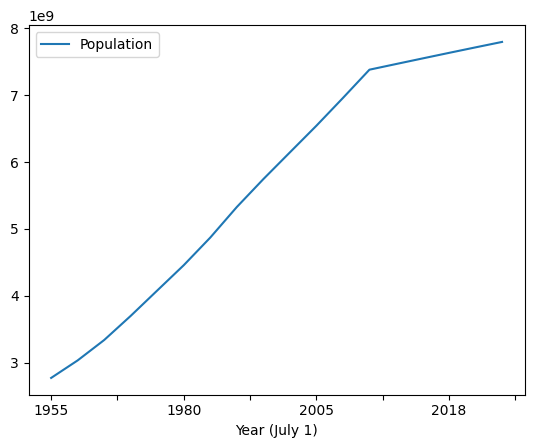

In [33]:
# Plot the population values over time
df.plot(x='Year (July 1)', y='Population')

In [30]:
#exports the data as an excel file
df.to_excel('word_population.xlsx')

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Imports the HTML into python
url = 'https://www.worldometers.info/coronavirus/'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#Subsets the HTML to only get the HTML of our table needed
table = soup.find('table', id = 'main_table_countries_today')
#Gets all the column headers of our table
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)
#gets all our data within the table and adds it to our list
my_list = []
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    my_list.append(row)
df =  pd.DataFrame(my_list, columns = headers)


ConnectionError: HTTPSConnectionPool(host='www.worldometers.info', port=443): Max retries exceeded with url: /coronavirus/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000017ED026EC20>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

# Project2 : Dealing with multiple pages
maktabkhoone

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://maktabkhooneh.org/learn/%D8%B2%D8%A8%D8%A7%D9%86%D9%87%D8%A7%DB%8C-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-mk76/?p=1&'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

In [37]:
courses = soup.find_all('div', class_ = 'side-margin bottom-margin js-filter-item active-item')

In [38]:
courses

[<div class="side-margin bottom-margin js-filter-item active-item" data-filter="PLUS" data-filter-set="plp" title="آموزش پایتون مقدماتی">
 <div class="course-card" data-carousel-discount-code="" data-landpage_url="" data-url="/course/346/extra-info/">
 <div class="course-card-extra js-extra-card">
 <div class="course-card-extra__triangle-wrapper">
 <div class="course-card-extra__triangle"></div>
 </div>
 <div class="course-card-extra__content js-extra-content" data-loaded="false">
 <div class="course-card-extra__loading">
 <i class="svg-icon--64"><svg class="svg-icon__spinner" viewbox="0 0 512 512" width="1000" xmlns="https://www.w3.org/2000/svg"><path d="M304 48c0 26.51-21.49 48-48 48s-48-21.49-48-48 21.49-48 48-48 48 21.49 48 48zm-48 368c-26.51 0-48 21.49-48 48s21.49 48 48 48 48-21.49 48-48-21.49-48-48-48zm208-208c-26.51 0-48 21.49-48 48s21.49 48 48 48 48-21.49 48-48-21.49-48-48-48zM96 256c0-26.51-21.49-48-48-48S0 229.49 0 256s21.49 48 48 48 48-21.49 48-48zm12.922 99.078c-26.51 0-48 

In [39]:
len(courses)

24

In [40]:
print(courses[0].prettify())

<div class="side-margin bottom-margin js-filter-item active-item" data-filter="PLUS" data-filter-set="plp" title="آموزش پایتون مقدماتی">
 <div class="course-card" data-carousel-discount-code="" data-landpage_url="" data-url="/course/346/extra-info/">
  <div class="course-card-extra js-extra-card">
   <div class="course-card-extra__triangle-wrapper">
    <div class="course-card-extra__triangle">
    </div>
   </div>
   <div class="course-card-extra__content js-extra-content" data-loaded="false">
    <div class="course-card-extra__loading">
     <i class="svg-icon--64">
      <svg class="svg-icon__spinner" viewbox="0 0 512 512" width="1000" xmlns="https://www.w3.org/2000/svg">
       <path d="M304 48c0 26.51-21.49 48-48 48s-48-21.49-48-48 21.49-48 48-48 48 21.49 48 48zm-48 368c-26.51 0-48 21.49-48 48s21.49 48 48 48 48-21.49 48-48-21.49-48-48-48zm208-208c-26.51 0-48 21.49-48 48s21.49 48 48 48 48-21.49 48-48-21.49-48-48-48zM96 256c0-26.51-21.49-48-48-48S0 229.49 0 256s21.49 48 48 48 48-21.

In [41]:
courses[0]['title']

'آموزش پایتون مقدماتی'

In [42]:
courses[0].find('div', class_ = 'course-card__title').text

'آموزش پایتون مقدماتی'

In [43]:
courses[0].find('div', {'class' : 'course-card__title'}).text

'آموزش پایتون مقدماتی'

In [44]:
help(courses[0].find)

Help on method find in module bs4.element:

find(name=None, attrs={}, recursive=True, string=None, **kwargs) method of bs4.element.Tag instance
    Look in the children of this PageElement and find the first
    PageElement that matches the given criteria.
    
    All find_* methods take a common set of arguments. See the online
    documentation for detailed explanations.
    
    :param name: A filter on tag name.
    :param attrs: A dictionary of filters on attribute values.
    :param recursive: If this is True, find() will perform a
        recursive search of this PageElement's children. Otherwise,
        only the direct children will be considered.
    :param limit: Stop looking after finding this many results.
    :kwargs: A dictionary of filters on attribute values.
    :return: A PageElement.
    :rtype: bs4.element.Tag | bs4.element.NavigableString



In [ ]:
courses[0]['data-filter']

In [45]:
courses[0].find('div', class_ = 'course-card__uni-title')

<div class="course-card__uni-title">مکتب‌خونه</div>

In [46]:
print(courses[0].find('div', class_ = 'course-card__uni-title').text)

مکتب‌خونه


In [47]:
courses[0].find('div', class_ = 'course-card__teacher').text

'\n                    \n                        جادی میرمیرانی\n                    \n                '

In [48]:
courses[0].find('div', class_ = 'course-card__teacher').text.strip()

'جادی میرمیرانی'

In [50]:
courses[0].find('a', class_ = 'course-card__wrapper')

<a class="course-card__wrapper" data-course-id="346" href="/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/">
<div class="course-card__badge--plus">
<div class="course-card__badge-icon-field">
<img alt="مکتب‌پلاس" class="course-card__badge-icon" src="/static/images/icon/plus-badge.png" title="مکتب‌پلاس"/>
<div class="course-card__badge-shadow"></div>
</div>
<div class="course-card__badge-text-field">
                 پلاس
                
            </div>
</div>
<img alt="آموزش آموزش پایتون مقدماتی مکتب‌خونه" class="course-card__img lazy" data-src="/media/CACHE/images/courses/images/py1_zfiocw1/caff65e264b0367146368cc4361df511.jpg" src="/static/images/course-card-2.png" title="آموزش آموزش پایتون مقدماتی مکتب‌خونه"/>
<div class="course-card__content">
<div class="course-card__title">آموزش پایتون مقدماتی</div>
<div class="course-c

In [51]:
courses[0].find('a', class_ = 'course-card__wrapper')['href']

'/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/'

In [52]:
print('https://maktabkhooneh.org'+courses[0].find('a', class_ = 'course-card__wrapper')['href'])

https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/


In [53]:
for course in courses:
    print('عنوان:', course['title'])
    try:
        print('مدرس:', course.find('div', class_ = 'course-card__teacher').text.strip())
    except:
        print('مدرس:', '')
    print('آموزشگاه:', course.find('div', class_ = 'course-card__uni-title').text)
    print('لینک', 'https://maktabkhooneh.org'+course.find('a', class_ = 'course-card__wrapper')['href'])

عنوان: آموزش پایتون مقدماتی
مدرس: جادی میرمیرانی
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/
عنوان: آموزش برنامه‌نویسی با پایتون (پیشرفته)
مدرس: جادی میرمیرانی
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%BE%DB%8C%D8%B4%D8%B1%D9%81%D8%AA%D9%87-mk387/
عنوان: آموزش رایگان پایتون مقدماتی
مدرس: علی مس‌فروش
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk674/
عنوان: آموزش رایگان توابع در پایتون
مدرس: حمید دانشجو
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org

AttributeError: 'NoneType' object has no attribute 'text'

In [54]:
for course in courses:
    try:
        print('عنوان:', course['title'])
    except:
        print('عنوان:', 'نامعلوم')
    
    try:
        print('مدرس:', course.find('div', class_ = 'course-card__teacher').text.strip())
    except:
        print('مدرس:', 'نامعلوم')
    
    try:
        print('آموزشگاه:', course.find('div', class_ = 'course-card__uni-title').text)
    except:
        print('آموزشگاه:', 'نامعلوم')
        
    try:
        print('لینک', 'https://maktabkhooneh.org'+course.find('a', class_ = 'course-card__wrapper')['href'])
    except:
        print('لینک', 'نامعلوم')

عنوان: آموزش پایتون مقدماتی
مدرس: جادی میرمیرانی
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/
عنوان: آموزش برنامه‌نویسی با پایتون (پیشرفته)
مدرس: جادی میرمیرانی
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%BE%DB%8C%D8%B4%D8%B1%D9%81%D8%AA%D9%87-mk387/
عنوان: آموزش رایگان پایتون مقدماتی
مدرس: علی مس‌فروش
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk674/
عنوان: آموزش رایگان توابع در پایتون
مدرس: حمید دانشجو
آموزشگاه: مکتب‌خونه
لینک https://maktabkhooneh.org

In [ ]:
for i in range(1,6):
    url = f'https://maktabkhooneh.org/learn/%D8%B2%D8%A8%D8%A7%D9%86%D9%87%D8%A7%DB%8C-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-mk76/?p={i}&'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')

    courses = soup.find_all('div', class_ = 'side-margin bottom-margin js-filter-item active-item')

    for course in courses:
        try:
            print('عنوان:', course['title'])
        except:
            print('عنوان:', 'نامعلوم')

        try:
            print('مدرس:', course.find('div', class_ = 'course-card__teacher').text.strip())
        except:
            print('مدرس:', 'نامعلوم')

        try:
            print('آموزشگاه:', course.find('div', class_ = 'course-card__uni-title').text)
        except:
            print('آموزشگاه:', 'نامعلوم')

        try:
            print('لینک', 'https://maktabkhooneh.org'+course.find('a', class_ = 'course-card__wrapper')['href'])
        except:
            print('لینک', 'نامعلوم')


In [55]:
import pandas as pd

data = []
#gets all our data within the table and adds it to our dataframe
for i in range(1,6):
    url = f'https://maktabkhooneh.org/learn/%D8%B2%D8%A8%D8%A7%D9%86%D9%87%D8%A7%DB%8C-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-mk76/?p={i}&'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')

    courses = soup.find_all('div', class_ = 'side-margin bottom-margin js-filter-item active-item')
    
    for course in courses:
        row_data = []
        try:
            row_data.append(course['title'])
        except:
            row_data.append('')

        try:
            row_data.append(course.find('div', class_ = 'course-card__teacher').text.strip())
        except:
            row_data.append('')

        try:
            row_data.append(course.find('div', class_ = 'course-card__uni-title').text)
        except:
            row_data.append('')

        try:
            row_data.append('https://maktabkhooneh.org'+course.find('a', class_ = 'course-card__wrapper')['href'])
        except:
            row_data.append('')
            
        data.append(row_data)


In [56]:
print(data)

[['آموزش پایتون مقدماتی', 'جادی میرمیرانی', 'مکتب\u200cخونه', 'https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/'], ['آموزش برنامه\u200cنویسی با پایتون (پیشرفته)', 'جادی میرمیرانی', 'مکتب\u200cخونه', 'https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%BE%DB%8C%D8%B4%D8%B1%D9%81%D8%AA%D9%87-mk387/'], ['آموزش رایگان پایتون مقدماتی', 'علی مس\u200cفروش', 'مکتب\u200cخونه', 'https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk674/'], ['آموزش رایگان توابع در پایتون', 'حمید دانشجو', 'مکتب\u200cخونه', 'https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D

In [57]:
headers = ['عنوان', 'مدرس', 'آموزشگاه', 'لینک']
#Creates a dataframe using the column headers from our table
df = pd.DataFrame(data, columns = headers)
df

,عنوان,مدرس,آموزشگاه,لینک
0,آموزش پایتون مقدماتی,جادی میرمیرانی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
1,آموزش برنامه‌نویسی با پایتون (پیشرفته),جادی میرمیرانی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
2,آموزش رایگان پایتون مقدماتی,علی مس‌فروش,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
3,آموزش رایگان توابع در پایتون,حمید دانشجو,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
4,آموزش رایگان یادگیری ماشین با پایتون,پویان راجیان,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
...,...,...,...,...
115,آموزش جامع طراحی و ساخت ربات معامله‌گر خودکار ...,سجاد جمالیان,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
116,آموزش کاربرد پایتون در امنیت,مهرداد میرابی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
117,آموزش برنامه‌‌نویسی با زبان Go,رامین فرج‌پور کامی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A8%D8%B1%...
118,آموزش آمار و احتمال در پایتون,محمدرضا کریمی‌نژاد,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...


In [58]:
df.head(50)

,عنوان,مدرس,آموزشگاه,لینک
0,آموزش پایتون مقدماتی,جادی میرمیرانی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
1,آموزش برنامه‌نویسی با پایتون (پیشرفته),جادی میرمیرانی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
2,آموزش رایگان پایتون مقدماتی,علی مس‌فروش,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
3,آموزش رایگان توابع در پایتون,حمید دانشجو,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
4,آموزش رایگان یادگیری ماشین با پایتون,پویان راجیان,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
5,آموزش مبانی برنامه‌نویسی پایتون,حمید دانشجو,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
6,"آموزش طراحی وب‌سایت با پایتون و جنگو (python, ...",,,https://maktabkhooneh.org/career/%D8%B7%D8%B1%...
7,نکات پایتون و حل مسائل الگوریتمی (لایو کدینگ),وحید نائینی,مکتب‌خونه,https://maktabkhooneh.org/course/%D9%86%DA%A9%...
8,آموزش رایگان کار با فایل‌ها در پایتون,حمید دانشجو,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...
9,آموزش رایگان مباحث پیشرفته پایتون,علی بیگدلی,مکتب‌خونه,https://maktabkhooneh.org/course/%D8%A2%D9%85%...


In [59]:
#exports the data as a xlsx
df.to_excel('maktabkhoone.xlsx')

In [ ]:
url = 'https://maktabkhooneh.org/course/%D8%A2%D9%85%D9%88%D8%B2%D8%B4-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D8%A8%D8%A7-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D9%85%D9%82%D8%AF%D9%85%D8%A7%D8%AA%DB%8C-mk346/'

In [ ]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')


In [ ]:
soup.find('div', class_ = 'course-card__price').text

In [ ]:
soup.find('div', class_ = 'course-card__price').text.strip().split('\n')[0]

In [ ]:
import pandas as pd

data = []
#gets all our data within the table and adds it to our dataframe
for i in range(1,6):
    url = f'https://maktabkhooneh.org/learn/%D8%B2%D8%A8%D8%A7%D9%86%D9%87%D8%A7%DB%8C-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-mk76/?p={i}&'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')

    courses = soup.find_all('div', class_ = 'side-margin bottom-margin js-filter-item active-item')
    
    for course in courses:
        row_data = []
        try:
            row_data.append(course['title'])
        except:
            row_data.append('')

        try:
            row_data.append(course.find('div', class_ = 'course-card__teacher').text.strip())
        except:
            row_data.append('')

        try:
            row_data.append(course.find('div', class_ = 'course-card__uni-title').text)
        except:
            row_data.append('')

        try:
            row_data.append('https://maktabkhooneh.org'+course.find('a', class_ = 'course-card__wrapper')['href'])
        except:
            row_data.append('')
            
        try:
            page = requests.get(row_data[-1])
            soup = BeautifulSoup(page.text, 'lxml')
            p = soup.find('div', class_ = 'course-card__price').text.strip().split('\n')[0]
            row_data.append(int(p.replace(',','')))
        except:
            row_data.append(0)
            
        data.append(row_data)


In [ ]:
headers = ['عنوان', 'مدرس', 'آموزشگاه', 'لینک', 'قیمت']
#Creates a dataframe using the column headers from our table
df = pd.DataFrame(data, columns = headers)
df

In [ ]:
df.head(50)

In [ ]:
df.sort_values(by=['قیمت']).head(50)

In [ ]:
login_url = df.loc[0, 'لینک']+'purchase/?type=FULL'
username = open('username.txt').read().strip()
password = open('password.txt').read().strip()

# Create a dictionary of the login credentials
login_data = {'username': username, 'password': password}

# Send a POST request to the login URL with the login data
response = requests.post(login_url, data=login_data)

# Check the response status code to see if the login was successful
if response.status_code == 200:
    print('Login successful!')
else:
    print('Login failed.')


# Javascript driven webpages

To add the webdriver to your system's path, you can follow these general steps:

Download the appropriate webdriver executable for your system and browser from the official website. For example, you can download the Chrome webdriver from here: https://sites.google.com/chromium.org/driver/?pli=1

Extract the executable file from the downloaded archive.

Move the executable file to a directory that is already in your system's PATH environment variable, or add the directory containing the executable file to your PATH.

Verify that the webdriver is now in your PATH by opening a new terminal window and typing webdriver or the name of the executable file. If it is properly installed and in your PATH, the command should execute without error.

Here are more detailed instructions for adding the webdriver to your PATH on Windows, macOS, and Linux:

Windows

Download the appropriate webdriver executable for your system and browser from the official website.

Extract the executable file from the downloaded archive.

Move the executable file to a directory that is already in your system's PATH, or create a new directory and add it to your PATH.

To add a new directory to your PATH in Windows, follow these steps:

Open the Start menu and search for "Environment Variables"
Click on "Edit the system environment variables"
Click on the "Environment Variables" button
In the "System Variables" section, scroll down and select the "Path" variable, then click "Edit"
Click "New" and enter the full path to the directory containing the webdriver executable file, then click "OK"
Close all the windows and open a new terminal window
Verify that the webdriver is now in your PATH by opening a new terminal window and typing webdriver or the name of the executable file. If it is properly installed and in your PATH, the command should execute without error.